# Data Analysis Pipeline - Lazada Seller Dataset

Notebook ini berisi implementasi dasar untuk analisis data dan preprocessing menggunakan:
- NumPy: Operasi array dan perhitungan numerik
- Pandas: Manipulasi dan analisis data
- Matplotlib/Seaborn: Visualisasi data
- Scikit-learn: Preprocessing data

## 1. Import Libraries

In [ ]:
# Import library dasar untuk analisis data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Setting visualisasi
plt.style.use('default')
sns.set_palette("husl")

## 2. Load Dataset

In [ ]:
# Load dataset menggunakan Pandas
df = pd.read_csv('Lazada-seller.csv')

print(f"Jumlah baris: {len(df)}")
print(f"Jumlah kolom: {len(df.columns)}")

Jumlah baris: 10942
Jumlah kolom: 9


## 3. Eksplorasi Data Awal

In [ ]:
# Melihat 5 baris pertama
df.head()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02
4,100005037,beli-harddisk-eksternal,Lenovo Ideapad 130-15AST LAPTOP MULTIMEDIA I A...,Lenovo,https://www.lazada.co.id/products/lenovo-ideap...,3984100,5,1,2019-10-02


In [ ]:
# Informasi tipe data dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   itemId         10942 non-null  int64 
 1   category       10942 non-null  object
 2   name           10942 non-null  object
 3   brandName      10938 non-null  object
 4   url            10942 non-null  object
 5   price          10942 non-null  int64 
 6   averageRating  10942 non-null  int64 
 7   totalReviews   10942 non-null  int64 
 8   retrievedDate  10942 non-null  object
dtypes: int64(4), object(5)
memory usage: 769.5+ KB


In [ ]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,itemId,price,averageRating,totalReviews
count,1.094200e+04,1.094200e+04,10942.000000,10942.000000
mean,2.936823e+08,3.020219e+06,4.171632,27.369494
std,2.090568e+08,6.681453e+06,1.032055,260.253817
min,6.068000e+03,1.000000e+03,1.000000,1.000000
25%,1.082924e+08,7.920000e+04,4.000000,1.000000
50%,3.540792e+08,1.095000e+06,4.000000,2.000000
75%,4.527141e+08,3.959000e+06,5.000000,7.000000
max,7.242170e+08,2.750000e+08,5.000000,9631.000000


In [ ]:
# Cek missing values
print("Missing values per kolom:")
print(df.isnull().sum())

Missing values per kolom:
itemId           0
category         0
name             0
brandName        4
url              0
price            0
averageRating    0
totalReviews     0
retrievedDate    0
dtype: int64


## 4. Data Cleaning

In [ ]:
# Cek duplikat data
print(f"Jumlah duplikat: {df.duplicated().sum()}")

# Hapus duplikat jika ada
df = df.drop_duplicates()
print(f"Jumlah baris setelah hapus duplikat: {len(df)}")

Jumlah duplikat: 0
Jumlah baris setelah hapus duplikat: 10942


In [ ]:
# Handle missing values - hapus baris dengan missing values
df_clean = df.dropna()
print(f"Jumlah baris setelah hapus missing values: {len(df_clean)}")

Jumlah baris setelah hapus missing values: 10938


In [ ]:
# Menggunakan NumPy untuk operasi pada kolom numerik
# Contoh: konversi ke array numpy
price_array = np.array(df_clean['price'])
rating_array = np.array(df_clean['averageRating'])

print("Statistik harga menggunakan NumPy:")
print(f"Mean: {np.mean(price_array)}")
print(f"Median: {np.median(price_array)}")
print(f"Std: {np.std(price_array)}")

Statistik harga menggunakan NumPy:
Mean: 3021084.8506125435
Median: 1095000.0
Std: 6682204.842901989


## 5. Visualisasi Data

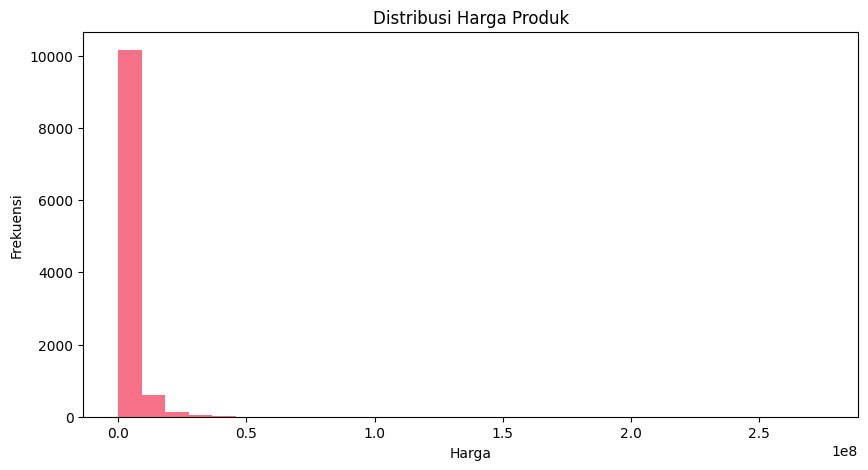

In [ ]:
# Histogram untuk distribusi harga menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.hist(df_clean['price'], bins=30)
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga Produk')
plt.show()

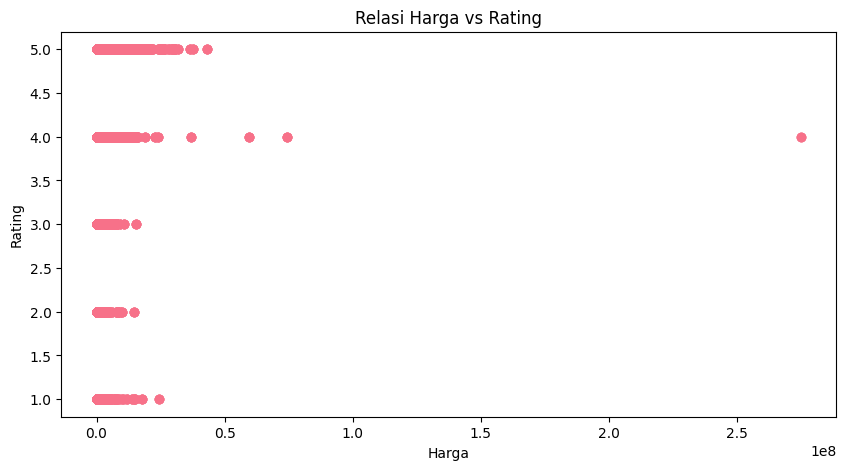

In [ ]:
# Scatter plot untuk relasi harga vs rating menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.scatter(df_clean['price'], df_clean['averageRating'])
plt.xlabel('Harga')
plt.ylabel('Rating')
plt.title('Relasi Harga vs Rating')
plt.show()

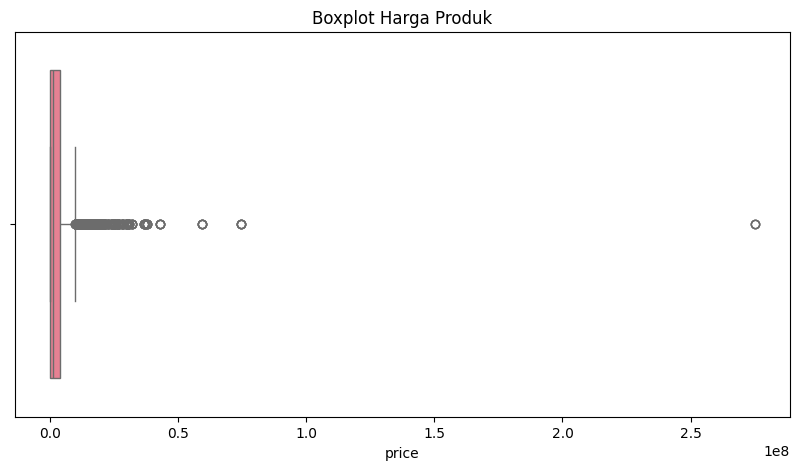

In [ ]:
# Boxplot untuk melihat outlier pada harga menggunakan Seaborn
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='price')
plt.title('Boxplot Harga Produk')
plt.show()

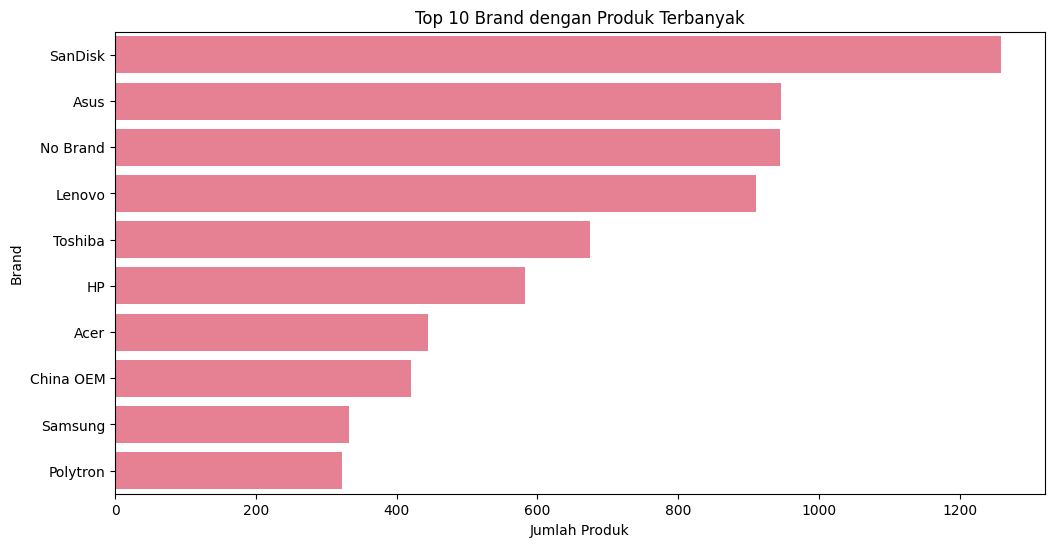

In [ ]:
# Countplot untuk melihat distribusi brand menggunakan Seaborn
plt.figure(figsize=(12, 6))
top_brands = df_clean['brandName'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.xlabel('Jumlah Produk')
plt.ylabel('Brand')
plt.title('Top 10 Brand dengan Produk Terbanyak')
plt.show()

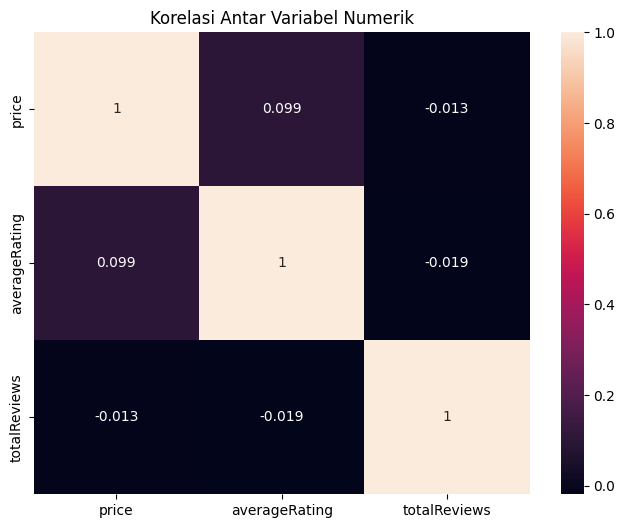

In [ ]:
# Heatmap untuk korelasi antar variabel numerik menggunakan Seaborn
plt.figure(figsize=(8, 6))
numeric_cols = df_clean[['price', 'averageRating', 'totalReviews']]
sns.heatmap(numeric_cols.corr(), annot=True)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

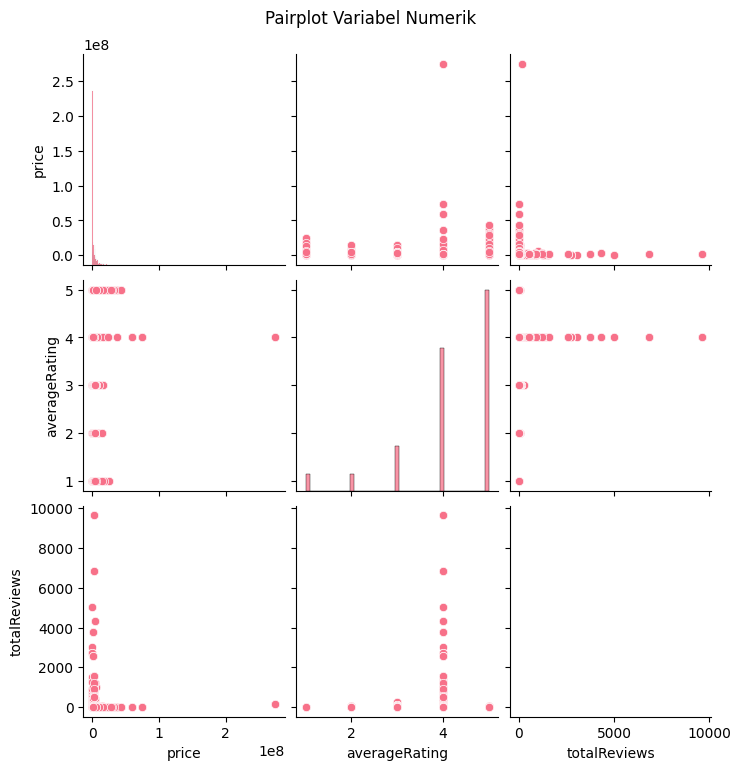

In [ ]:
# Pairplot untuk melihat relasi antar variabel numerik
numeric_data = df_clean[['price', 'averageRating', 'totalReviews']]
sns.pairplot(numeric_data)
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

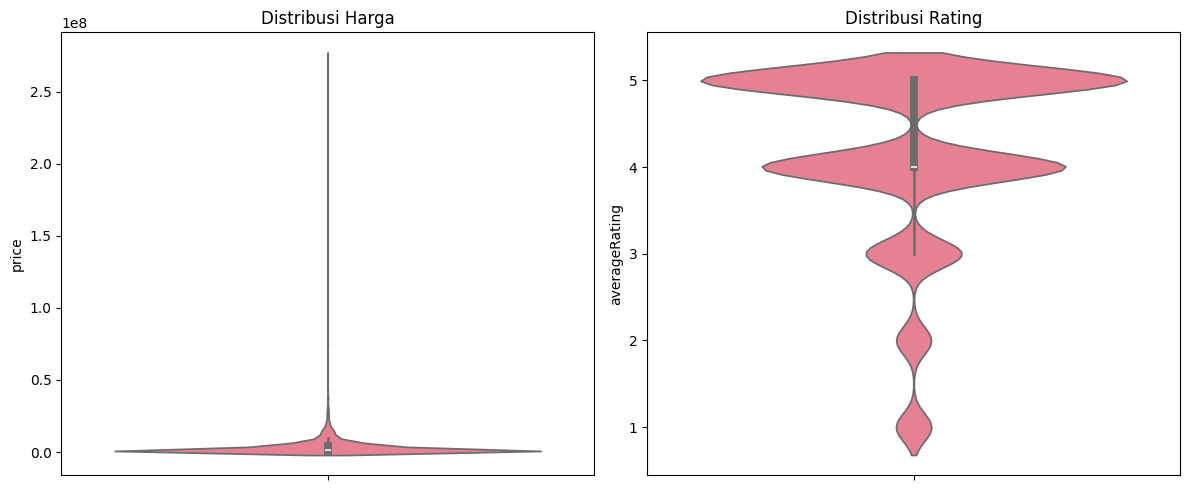

In [ ]:
# Violinplot untuk distribusi harga dan rating
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.violinplot(data=df_clean, y='price')
plt.title('Distribusi Harga')

plt.subplot(1, 2, 2)
sns.violinplot(data=df_clean, y='averageRating')
plt.title('Distribusi Rating')

plt.tight_layout()
plt.show()

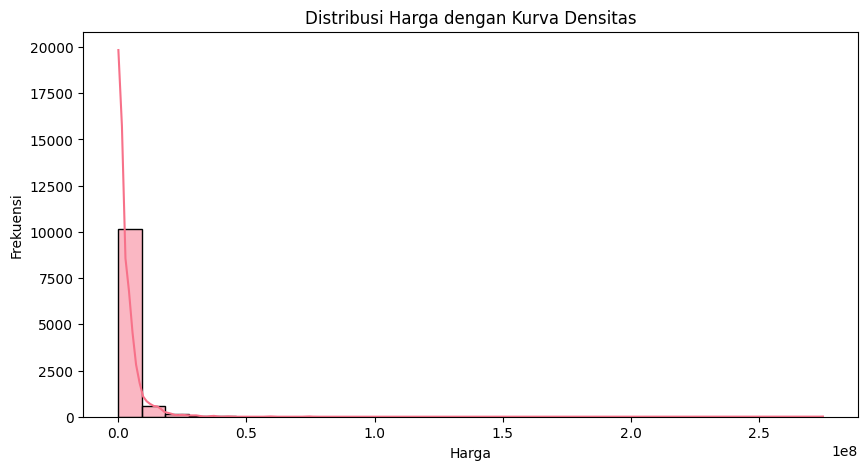

In [ ]:
# Distplot untuk distribusi harga
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['price'], kde=True, bins=30)
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga dengan Kurva Densitas')
plt.show()

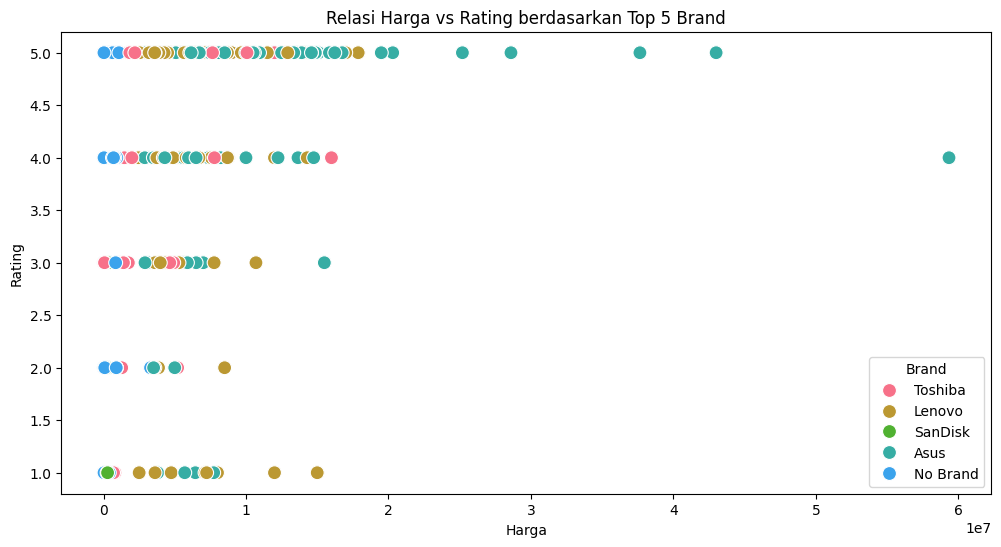

In [ ]:
# Scatterplot dengan hue untuk melihat relasi harga, rating, dan brand
plt.figure(figsize=(12, 6))
top_5_brands = df_clean['brandName'].value_counts().head(5).index
df_top_brands = df_clean[df_clean['brandName'].isin(top_5_brands)]

sns.scatterplot(data=df_top_brands, x='price', y='averageRating', hue='brandName', s=100)
plt.xlabel('Harga')
plt.ylabel('Rating')
plt.title('Relasi Harga vs Rating berdasarkan Top 5 Brand')
plt.legend(title='Brand')
plt.show()

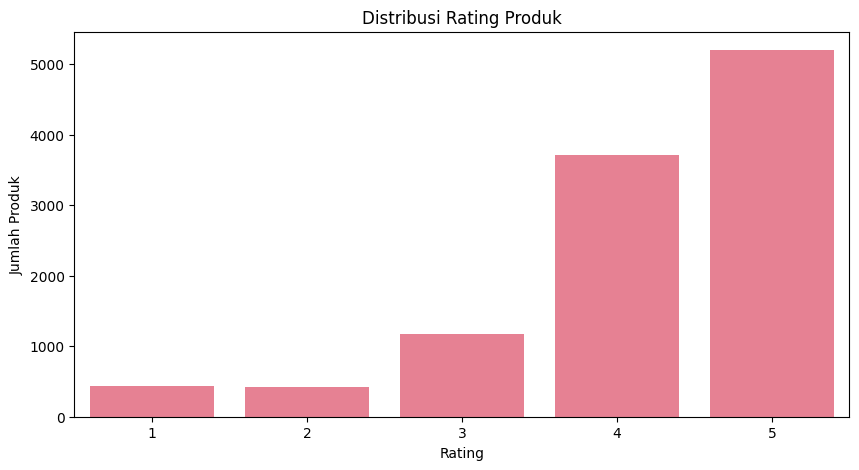

In [ ]:
# Countplot untuk distribusi rating
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='averageRating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Produk')
plt.title('Distribusi Rating Produk')
plt.show()

### Analisis dengan GroupBy dan Agregasi

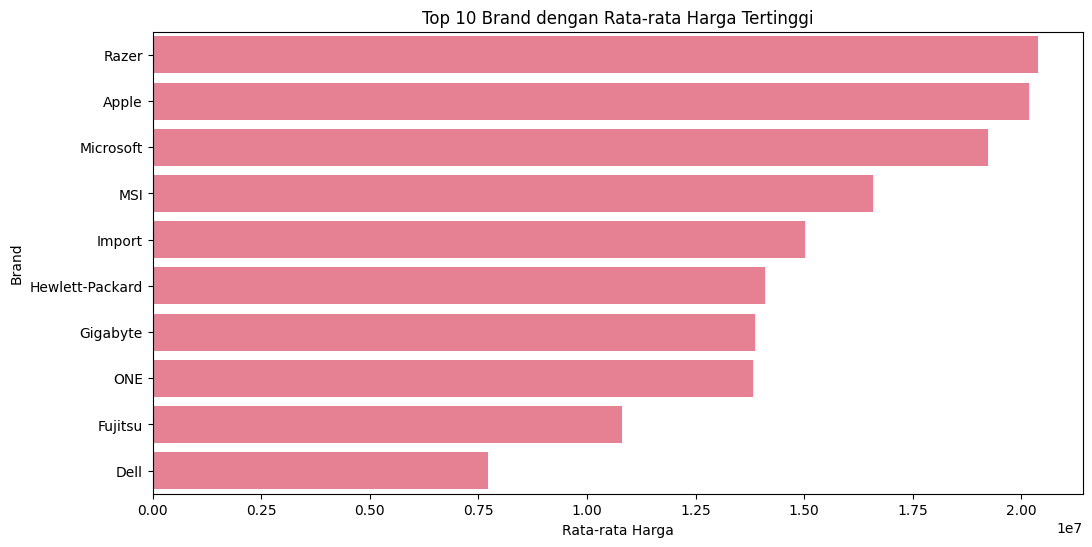

In [ ]:
# GroupBy brand, hitung rata-rata harga
avg_price_brand = df_clean.groupby('brandName')['price'].mean()

# Urutkan dan ambil top 10
top_10 = avg_price_brand.sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index)

plt.xlabel('Rata-rata Harga')
plt.ylabel('Brand')
plt.title('Top 10 Brand dengan Rata-rata Harga Tertinggi')
plt.show()

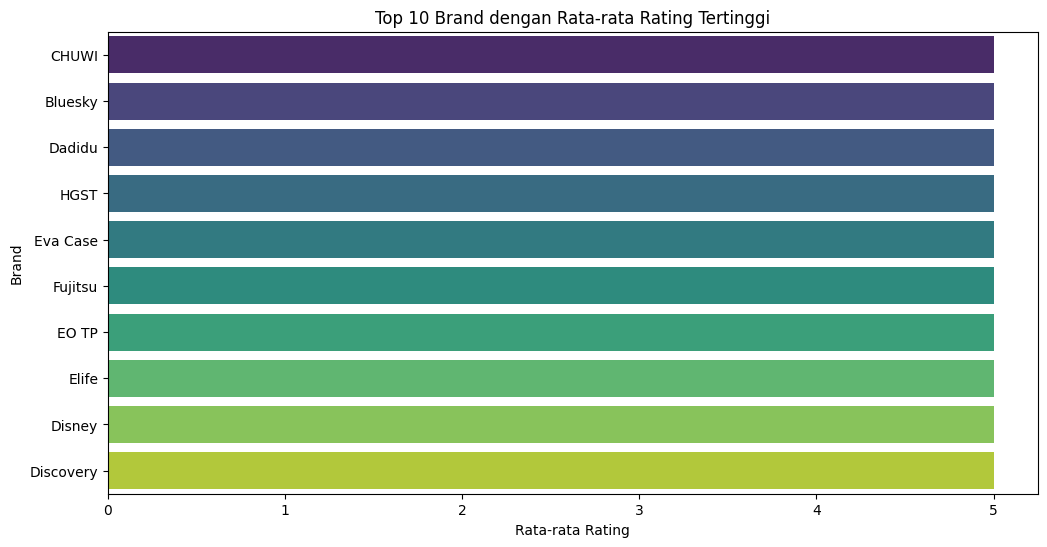

In [ ]:
# GroupBy brand, hitung rata-rata rating
avg_rating_brand = df_clean.groupby('brandName')['averageRating'].mean()

# Urutkan dan ambil top 10
top_10 = avg_rating_brand.sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')

plt.xlabel('Rata-rata Rating')
plt.ylabel('Brand')
plt.title('Top 10 Brand dengan Rata-rata Rating Tertinggi')
plt.show()

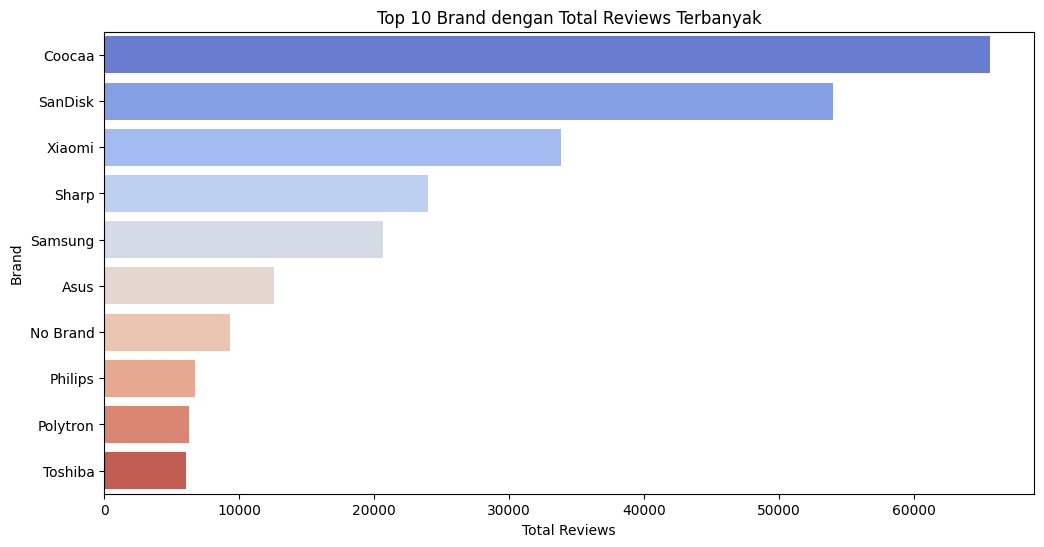

In [ ]:
# GroupBy brand, jumlahkan total reviews
total_reviews = df_clean.groupby('brandName')['totalReviews'].sum()

# Urutkan dan ambil top 10
top_10 = total_reviews.sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='coolwarm')

plt.xlabel('Total Reviews')
plt.ylabel('Brand')
plt.title('Top 10 Brand dengan Total Reviews Terbanyak')
plt.show()

In [ ]:
# GroupBy brand dengan multiple agregasi
brand_stats = df_clean.groupby('brandName').agg({
    'itemId': 'count',           # Hitung jumlah produk
    'price': 'mean',             # Rata-rata harga
    'averageRating': 'mean'      # Rata-rata rating
})

# Rename kolom dan ambil top 10
brand_stats = brand_stats.rename(columns={'itemId': 'jumlah_produk'})

brand_stats = brand_stats.sort_values('jumlah_produk', ascending=False).head(10)

print("Statistik Top 10 Brand:")
print(brand_stats)

Statistik Top 10 Brand:
           jumlah_produk         price  averageRating
brandName                                            
SanDisk             1258  1.404264e+05       4.332273
Asus                 946  7.413175e+06       4.429175
No Brand             945  2.181468e+05       3.931217
Lenovo               910  6.116788e+06       4.340659
Toshiba              674  1.199891e+06       3.685460
HP                   582  4.488368e+06       4.187285
Acer                 445  7.153137e+06       4.258427
China OEM            421  2.102336e+05       3.826603
Samsung              333  3.650789e+06       4.045045
Polytron             323  2.026671e+06       4.479876


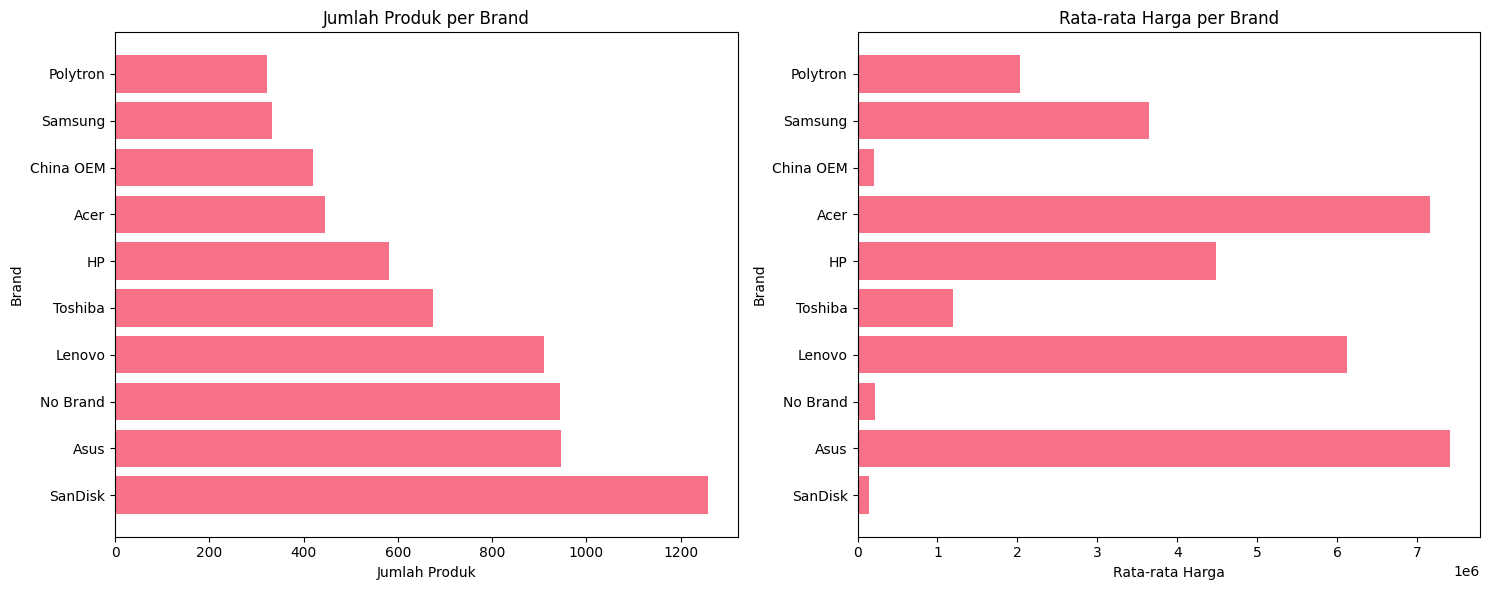

In [ ]:
# Buat 2 subplot untuk perbandingan
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: Jumlah produk
axes[0].barh(brand_stats.index, brand_stats['jumlah_produk'])
axes[0].set_xlabel('Jumlah Produk')
axes[0].set_ylabel('Brand')
axes[0].set_title('Jumlah Produk per Brand')

# Chart 2: Rata-rata harga
axes[1].barh(brand_stats.index, brand_stats['price'])
axes[1].set_xlabel('Rata-rata Harga')
axes[1].set_ylabel('Brand')
axes[1].set_title('Rata-rata Harga per Brand')

plt.tight_layout()
plt.show()

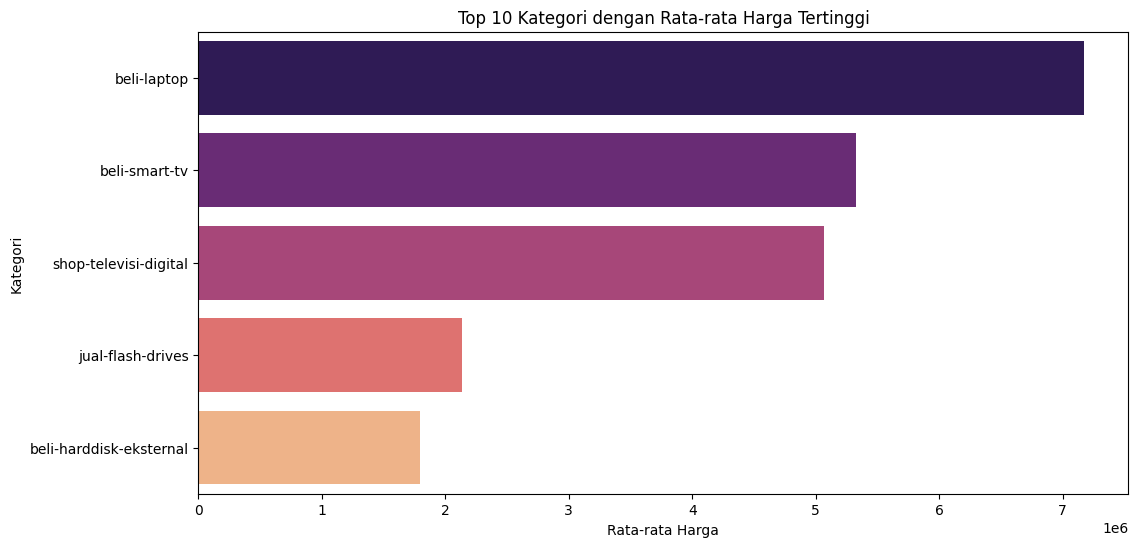

In [ ]:
# GroupBy kategori, hitung rata-rata harga
category_price = df_clean.groupby('category')['price'].mean()

# Urutkan dan ambil top 10
top_10 = category_price.sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='magma')

plt.xlabel('Rata-rata Harga')
plt.ylabel('Kategori')
plt.title('Top 10 Kategori dengan Rata-rata Harga Tertinggi')
plt.show()

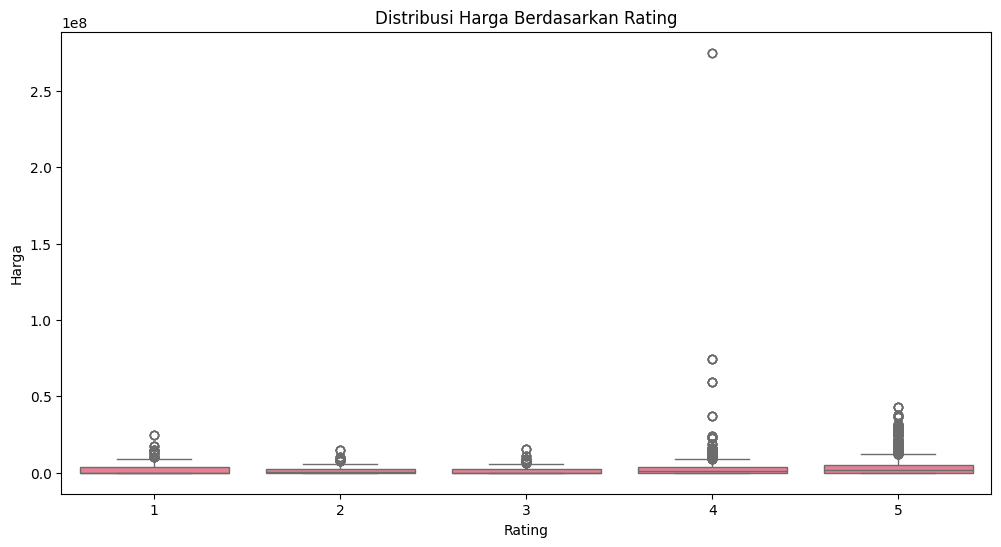

In [ ]:
# Boxplot untuk melihat distribusi harga per rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='averageRating', y='price')
plt.xlabel('Rating')
plt.ylabel('Harga')
plt.title('Distribusi Harga Berdasarkan Rating')
plt.show()

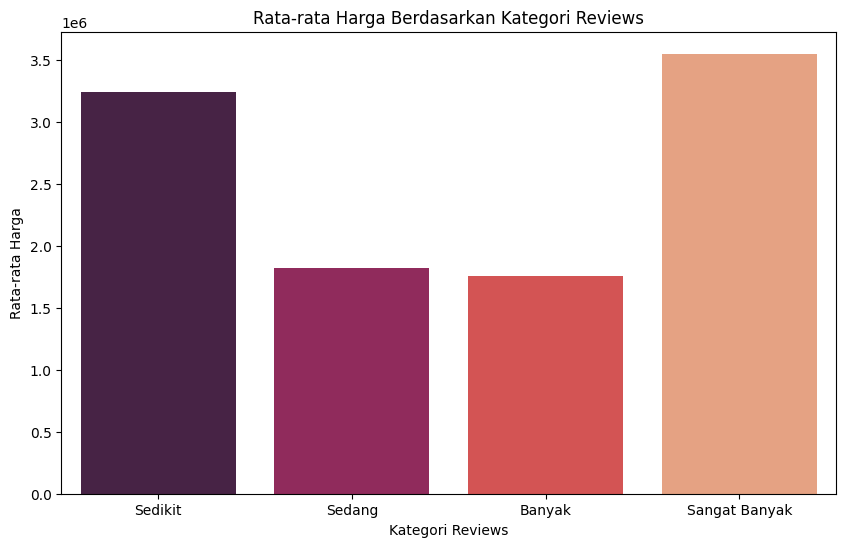

In [ ]:
# Buat kategori berdasarkan jumlah reviews
df_clean['review_category'] = pd.cut(df_clean['totalReviews'],
                                      bins=[0, 10, 50, 100, float('inf')],
                                      labels=['Sedikit', 'Sedang', 'Banyak', 'Sangat Banyak'])

# GroupBy kategori reviews, hitung rata-rata harga
review_price = df_clean.groupby('review_category')['price'].mean()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=review_price.index, y=review_price.values, palette='rocket')
plt.xlabel('Kategori Reviews')
plt.ylabel('Rata-rata Harga')
plt.title('Rata-rata Harga Berdasarkan Kategori Reviews')
plt.show()

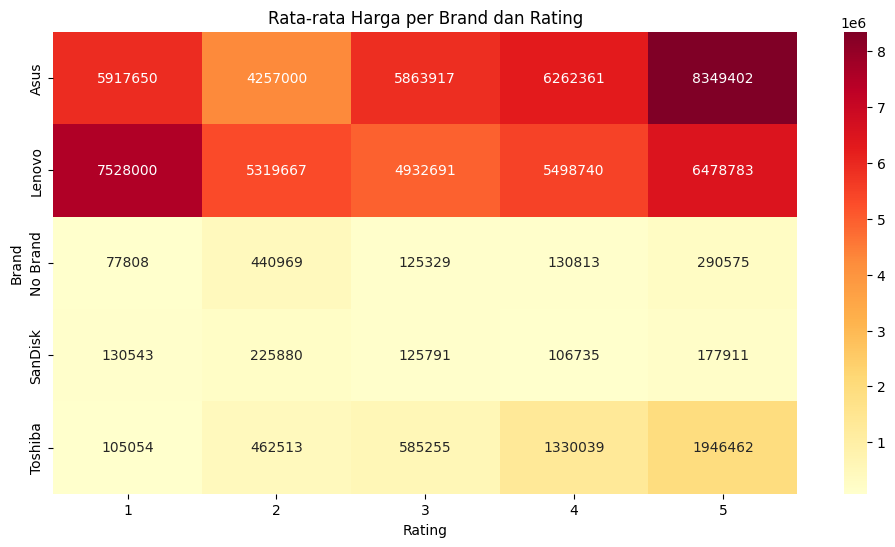

In [ ]:
# Filter top 5 brands
top_brands = df_clean['brandName'].value_counts().head(5).index
df_filtered = df_clean[df_clean['brandName'].isin(top_brands)]

# Buat pivot table: rata-rata harga per brand dan rating
pivot_table = df_filtered.pivot_table(values='price',
                                       index='brandName',
                                       columns='averageRating',
                                       aggfunc='mean')

# Visualisasi heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.xlabel('Rating')
plt.ylabel('Brand')
plt.title('Rata-rata Harga per Brand dan Rating')
plt.show()

## 6. Feature Engineering

In [ ]:
# Membuat fitur baru menggunakan Pandas
# Contoh: kategori harga berdasarkan rentang

df_clean['price_category'] = pd.cut(df_clean['price'],
                                     bins=[0, 100000, 500000, 1000000, float('inf')],
                                     labels=['Murah', 'Sedang', 'Mahal', 'Sangat Mahal'])

print(df_clean[['price', 'price_category']].head())

     price price_category
0  2499000   Sangat Mahal
1  3788000   Sangat Mahal
2  3850000   Sangat Mahal
3  1275000   Sangat Mahal
4  3984100   Sangat Mahal


In [ ]:
# Membuat fitur kategori rating
df_clean['rating_category'] = pd.cut(df_clean['averageRating'],
                                      bins=[0, 2, 3, 4, 5],
                                      labels=['Buruk', 'Cukup', 'Baik', 'Sangat Baik'])

print(df_clean[['averageRating', 'rating_category']].head())

   averageRating rating_category
0              4            Baik
1              3           Cukup
2              3           Cukup
3              3           Cukup
4              5     Sangat Baik


## 7. Preprocessing dengan Scikit-learn

In [ ]:
# Label Encoding untuk kolom kategorikal
label_encoder = LabelEncoder()

# Encode kolom brandName
df_clean['brandName_encoded'] = label_encoder.fit_transform(df_clean['brandName'])

print("Brand Name Encoding:")
print(df_clean[['brandName', 'brandName_encoded']].head())

Brand Name Encoding:
  brandName  brandName_encoded
0   Toshiba                191
1   Toshiba                191
2        LG                 90
3     Sharp                174
4    Lenovo                 95


In [ ]:
# Standardisasi fitur numerik menggunakan StandardScaler
scaler = StandardScaler()

# Pilih kolom numerik untuk standardisasi
numeric_features = ['price', 'averageRating', 'totalReviews']

# Fit dan transform data
df_clean[['price_scaled', 'rating_scaled', 'reviews_scaled']] = scaler.fit_transform(df_clean[numeric_features])

print("Data sebelum dan sesudah scaling:")
print(df_clean[['price', 'price_scaled', 'averageRating', 'rating_scaled']].head())

Data sebelum dan sesudah scaling:
     price  price_scaled  averageRating  rating_scaled
0  2499000     -0.078131              4      -0.166608
1  3788000      0.114770              3      -1.135948
2  3850000      0.124048              3      -1.135948
3  1275000     -0.261304              3      -1.135948
4  3984100      0.144116              5       0.802732


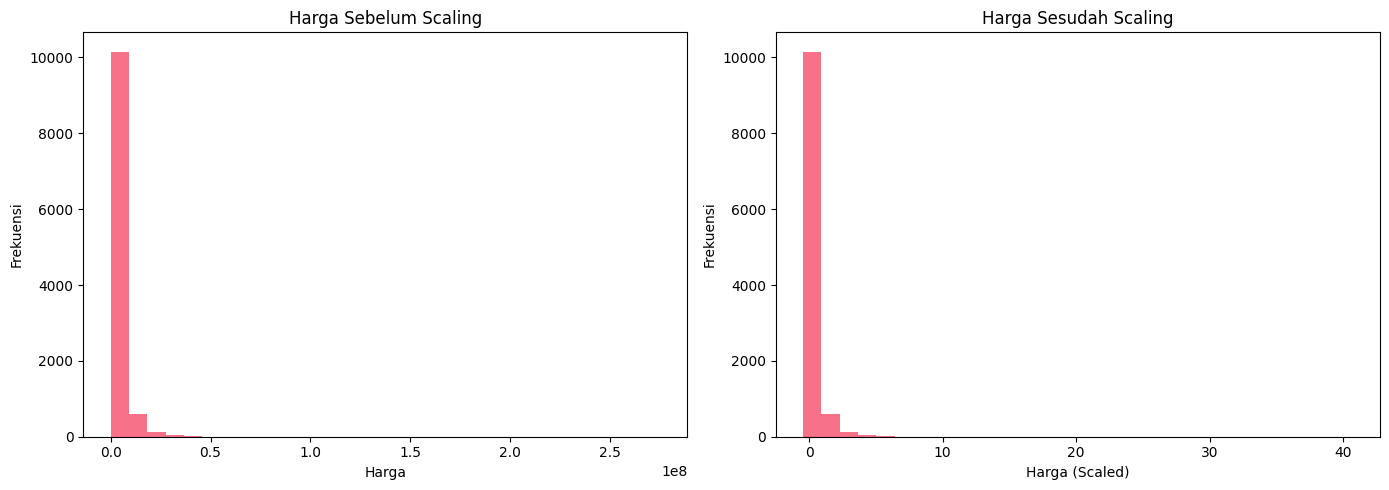

In [ ]:
# Visualisasi perbandingan data sebelum dan sesudah scaling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sebelum scaling
axes[0].hist(df_clean['price'], bins=30)
axes[0].set_title('Harga Sebelum Scaling')
axes[0].set_xlabel('Harga')
axes[0].set_ylabel('Frekuensi')

# Sesudah scaling
axes[1].hist(df_clean['price_scaled'], bins=30)
axes[1].set_title('Harga Sesudah Scaling')
axes[1].set_xlabel('Harga (Scaled)')
axes[1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

## 8. Ringkasan Data Setelah Preprocessing

In [ ]:
# Tampilkan informasi dataset final
print("Informasi Dataset Setelah Preprocessing:")
print(f"Jumlah baris: {len(df_clean)}")
print(f"Jumlah kolom: {len(df_clean.columns)}")
print(f"\nKolom-kolom yang tersedia:")
print(df_clean.columns.tolist())

Informasi Dataset Setelah Preprocessing:
Jumlah baris: 10938
Jumlah kolom: 16

Kolom-kolom yang tersedia:
['itemId', 'category', 'name', 'brandName', 'url', 'price', 'averageRating', 'totalReviews', 'retrievedDate', 'review_category', 'price_category', 'rating_category', 'brandName_encoded', 'price_scaled', 'rating_scaled', 'reviews_scaled']


In [ ]:
# Tampilkan sample data final
print("Sample data setelah preprocessing:")
df_clean.head(10)

Sample data setelah preprocessing:


,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate,review_category,price_category,rating_category,brandName_encoded,price_scaled,rating_scaled,reviews_scaled
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02,Sedikit,Sangat Mahal,Baik,191,-0.078131,-0.166608,-0.074452
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02,Sedikit,Sangat Mahal,Cukup,191,0.114770,-1.135948,-0.093661
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02,Sedikit,Sangat Mahal,Cukup,90,0.124048,-1.135948,-0.097503
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02,Sedang,Sangat Mahal,Cukup,174,-0.261304,-1.135948,-0.062926
4,100005037,beli-harddisk-eksternal,Lenovo Ideapad 130-15AST LAPTOP MULTIMEDIA I A...,Lenovo,https://www.lazada.co.id/products/lenovo-ideap...,3984100,5,1,2019-10-02,Sedikit,Sangat Mahal,Sangat Baik,95,0.144116,0.802732,-0.101345
5,100006860,beli-harddisk-eksternal,Sandisk Flashdisk Cruzer Glide CZ60 16GB + iRi...,SanDisk,https://www.lazada.co.id/products/sandisk-flas...,55800,4,2,2019-10-02,Sedikit,Murah,Baik,167,-0.443758,-0.166608,-0.097503
6,100007498,beli-harddisk-eksternal,Asus X407UB-BV187T Laptop Multimedia Murah I C...,Asus,https://www.lazada.co.id/products/asus-x407ub-...,8132000,5,2,2019-10-02,Sedikit,Sangat Mahal,Sangat Baik,16,0.764855,0.802732,-0.097503
7,100010722,beli-harddisk-eksternal,"Philips 32PHA3052S/70 32"" Televisi LED (FREE B...",Philips,https://www.lazada.co.id/products/philips-32ph...,1990000,4,10,2019-10-02,Sedikit,Sangat Mahal,Baik,138,-0.154303,-0.166608,-0.066768
8,100010745,beli-harddisk-eksternal,Philips 39PHA4251S/70 39' Televisi LED (FREE B...,Philips,https://www.lazada.co.id/products/philips-39ph...,3190000,4,7,2019-10-02,Sedikit,Sangat Mahal,Baik,138,0.025278,-0.166608,-0.078294
9,100015720,beli-harddisk-eksternal,Acer E5 575G-74E2 - Core i7-6500U - RAM 8GB DD...,Acer,https://www.lazada.co.id/products/acer-e5-575g...,8000000,3,8,2019-10-02,Sedikit,Sangat Mahal,Cukup,3,0.745101,-1.135948,-0.074452


In [ ]:
# Simpan data yang sudah dipreprocess
df_clean.to_csv('Lazada-seller-processed.csv', index=False)
print("Data berhasil disimpan ke 'Lazada-seller-processed.csv'")

Data berhasil disimpan ke 'Lazada-seller-processed.csv'
